In [89]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [90]:
df= pd.read_csv ("/home/siddharth/Desktop/horse.csv")

In [91]:
df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [198]:
df.info()
df["outcome"].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

array(['died', 'euthanized', 'lived'], dtype=object)

In [93]:
threshold= len(df)- (30*len(df))/100
threshold

209.3

### Dropping columns with more than 30% missing data :

In [347]:
df2=df
df2= df.dropna(thresh= threshold, axis= 1)

In [348]:
df2.isnull().sum()/len(df)*100>30

surgery                  False
age                      False
hospital_number          False
rectal_temp              False
pulse                    False
respiratory_rate         False
temp_of_extremities      False
peripheral_pulse         False
mucous_membrane          False
capillary_refill_time    False
pain                     False
peristalsis              False
abdominal_distention     False
packed_cell_volume       False
total_protein            False
outcome                  False
surgical_lesion          False
lesion_1                 False
lesion_2                 False
lesion_3                 False
cp_data                  False
dtype: bool

In [349]:
hosp_number=df2.hospital_number.unique()

In [350]:
df2=df2.drop(['hospital_number'], axis= 1)

In [351]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   rectal_temp            239 non-null    float64
 3   pulse                  275 non-null    float64
 4   respiratory_rate       241 non-null    float64
 5   temp_of_extremities    243 non-null    object 
 6   peripheral_pulse       230 non-null    object 
 7   mucous_membrane        252 non-null    object 
 8   capillary_refill_time  267 non-null    object 
 9   pain                   244 non-null    object 
 10  peristalsis            255 non-null    object 
 11  abdominal_distention   243 non-null    object 
 12  packed_cell_volume     270 non-null    float64
 13  total_protein          266 non-null    float64
 14  outcome                299 non-null    object 
 15  surgic

In [352]:
df2.groupby("outcome").mean()

,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,lesion_1,lesion_2,lesion_3
outcome,,,,,,,,
died,38.179245,87.227273,33.034483,52.536232,6.844615,4657.064935,0.000000,0.000000
euthanized,38.052941,81.744186,31.138889,50.777778,42.038889,3345.863636,31.818182,0.000000
lived,38.190789,63.421687,29.278912,42.727273,27.264848,3305.848315,144.202247,12.410112


### Splitting data into different data sets before filling missing numeric values, as values vary based on outcome.
### 1) Lived:

In [353]:
filter1= df2["outcome"] == "lived"

In [354]:
lived=df2[filter1]

In [355]:
lived["outcome"].unique()

array(['lived'], dtype=object)

In [356]:
cols2=lived.select_dtypes(include="float64").columns 
cols2
cols3= df3.select_dtypes(exclude="float64").columns
cols3 

Index(['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'outcome', 'surgical_lesion', 'lesion_1',
       'lesion_2', 'lesion_3', 'cp_data'],
      dtype='object')

/home/siddharth/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/siddharth/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/siddharth/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

<AxesSubplot:xlabel='total_protein', ylabel='Density'>

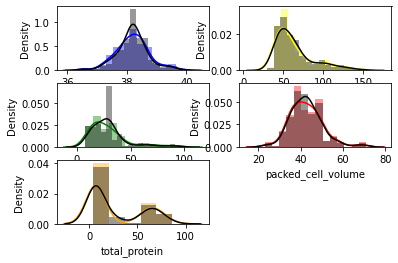

In [357]:
plt.subplot(3,2,1)
sns.distplot(lived["rectal_temp"], color= "blue")
sns.distplot(lived["rectal_temp"].fillna(lived["rectal_temp"].mean()), color="black")

plt.subplot(3,2,2)
sns.distplot(lived["pulse"],color= "yellow")
sns.distplot(lived["pulse"].fillna(lived["pulse"].mean()), color="black")

plt.subplot(3,2,3)
sns.distplot(lived["respiratory_rate"], color= 'green')
sns.distplot(lived["respiratory_rate"].fillna(lived["respiratory_rate"].mean()), color="black")

plt.subplot(3,2,4)
sns.distplot(lived["packed_cell_volume"], color= 'red')
sns.distplot(lived["packed_cell_volume"].fillna(lived["packed_cell_volume"].mean()), color="black")


plt.subplot(3,2,5)
sns.distplot(lived["total_protein"], color= 'orange')
sns.distplot(lived["total_protein"].fillna(lived["total_protein"].mean()), color="black")


In [358]:
for i in cols2:
    if lived[i].isnull().sum()>0:
        lived[i]= lived[i].fillna(lived[i].mean())

/home/siddharth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [359]:
for i in cols3:
    if lived[i].isnull().sum()>0:
        lived[i]= lived[i].fillna(lived[i].mode()[0])

/home/siddharth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [360]:
lived.isnull().sum()

surgery                  0
age                      0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
packed_cell_volume       0
total_protein            0
outcome                  0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
dtype: int64

### 2) Died:

In [361]:
filter2= df2["outcome"]== "died"

In [362]:
died= df2[filter2]
died["outcome"].unique()

array(['died'], dtype=object)

In [363]:
for i in cols2:
    if died[i].isnull().sum()>0:
        died[i]= died[i].fillna(died[i].mean())

/home/siddharth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [364]:
for i in cols3:
    if died[i].isnull().sum()>0:
        died[i]= died[i].fillna(died[i].mode()[0])

/home/siddharth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [365]:
died.isna().sum()

surgery                  0
age                      0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
packed_cell_volume       0
total_protein            0
outcome                  0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
dtype: int64

### 3) euthanized

In [366]:
filter3= df2["outcome"]== "euthanized"

In [367]:
euthanized= df2[filter3]

In [368]:
euthanized["outcome"].unique()

array(['euthanized'], dtype=object)

In [369]:
for i in cols2:
    if euthanized[i].isnull().sum()>0:
        euthanized[i]= euthanized[i].fillna(euthanized[i].mean())

/home/siddharth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [370]:
for i in cols3:
    if euthanized[i].isnull().sum()>0:
        euthanized[i]= euthanized[i].fillna(euthanized[i].mode()[0])

/home/siddharth/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [371]:
euthanized.isnull().sum()

surgery                  0
age                      0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
packed_cell_volume       0
total_protein            0
outcome                  0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
dtype: int64

### combinig 3 dataframes 

In [372]:
frames=[lived,euthanized, died]
df3= lived.append(died)

In [373]:
df3= df3.append(euthanized)

df3.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 2 to 298
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   rectal_temp            299 non-null    float64
 3   pulse                  299 non-null    float64
 4   respiratory_rate       299 non-null    float64
 5   temp_of_extremities    299 non-null    object 
 6   peripheral_pulse       299 non-null    object 
 7   mucous_membrane        299 non-null    object 
 8   capillary_refill_time  299 non-null    object 
 9   pain                   299 non-null    object 
 10  peristalsis            299 non-null    object 
 11  abdominal_distention   299 non-null    object 
 12  packed_cell_volume     299 non-null    float64
 13  total_protein          299 non-null    float64
 14  outcome                299 non-null    object 
 15  surgic

### Checking correlation of numeric data:

<AxesSubplot:>

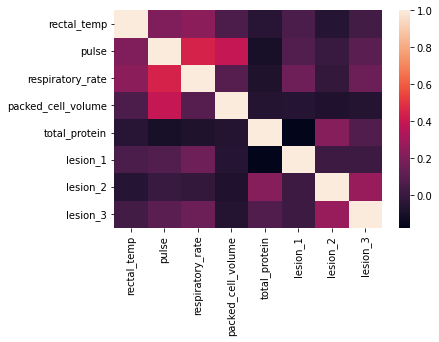

In [374]:
sns.heatmap(df3.corr())

### Encoding catogorical data:


In [375]:
x= df3.drop(["outcome"], axis= 1)
y= df3["outcome"]

In [376]:
x=pd.get_dummies(x)
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 2 to 298
Data columns (total 46 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rectal_temp                       299 non-null    float64
 1   pulse                             299 non-null    float64
 2   respiratory_rate                  299 non-null    float64
 3   packed_cell_volume                299 non-null    float64
 4   total_protein                     299 non-null    float64
 5   lesion_1                          299 non-null    int64  
 6   lesion_2                          299 non-null    int64  
 7   lesion_3                          299 non-null    int64  
 8   surgery_no                        299 non-null    uint8  
 9   surgery_yes                       299 non-null    uint8  
 10  age_adult                         299 non-null    uint8  
 11  age_young                         299 non-null    uint8  
 12  temp_of_

In [377]:
from sklearn.model_selection import train_test_split 

In [378]:
x_train, x_test, y_train, y_test= train_test_split (x,y, test_size= 0.3)

In [379]:
print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)

(209, 46)
(90, 46)
(209,)
(90,)


<AxesSubplot:xlabel='outcome', ylabel='Count'>

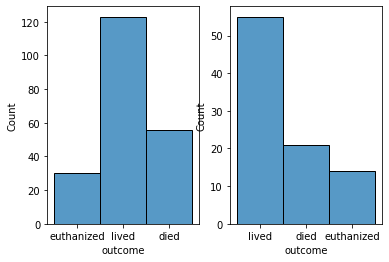

In [380]:
plt.subplot(1,2,1)
sns.histplot(y_train)
plt.subplot(1,2,2)
sns.histplot(y_test)

In [437]:
print(y_train.value_counts())
print("total number of samples:",len(y_train))

lived         123
died           56
euthanized     30
Name: outcome, dtype: int64
total number of samples: 209


In [446]:
#class weights=
print ("lived cw=",209/(3*123))
print ("died cw=", 209/(3*56))
print ("euthanized cw=", 209/(3*30))
wts={"lived": 0.56, "died": 1.24, "euthanized": 2.32}

from sklearn.utils.class_weight import compute_class_weight
cw= compute_class_weight(class_weight='balanced', classes=np.unique(y_train),y=  y_train)
print(cw)



lived cw= 0.5663956639566395
died cw= 1.244047619047619
euthanized cw= 2.3222222222222224
[1.24404762 2.32222222 0.56639566]


In [381]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()

In [382]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [452]:
dtscore=dt.score(x_test, y_test)
print(dtscore)

0.7555555555555555


In [384]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()

In [385]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [453]:
rfscore=rf.score(x_train, y_train)
print(rfscore)

1.0


In [387]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler 
std=StandardScaler()
sc= MinMaxScaler()
nb= GaussianNB()

In [388]:
sc.fit(x_train)
sctrain=sc.transform(x_train)
sctest=sc.transform(x_test)

In [389]:
std.fit(x_train)
stdtrain= std.transform(x_train)
stdtest=std.transform(x_test)

In [390]:
nb.fit(x_train, y_train, )

GaussianNB()

In [454]:
nbscore=nb.score(x_test, y_test)
print(nbscore)

0.7222222222222222


In [392]:
from sklearn.svm import SVC
svc= SVC()

In [448]:
svc.fit(stdtrain, y_train)

SVC()

In [455]:
svcscore=svc.score(stdtest, y_test)
print (svcscore)

0.7444444444444445


In [458]:
# Comparing scores :
print ("FINAL SCORES:")
print ("Random Forest Score:", rfscore)
print ("Decision Tree Score:", dtscore)
print ("SVC score:", svcscore )
print ("Naive-Bayes score:", nbscore)

FINAL SCORES:
Random Forest Score: 1.0
Decision Tree Score: 0.7555555555555555
SVC score: 0.7444444444444445
Naive-Bayes score: 0.7222222222222222


In [461]:
# Random forest has got 100% prediction score. viewing confusion matrix and classification report:
from sklearn.metrics import confusion_matrix, classification_report
rfpred=rf.predict(x_test)
confusion_matrix(y_test, rfpred)


array([[16,  0,  5],
       [ 3,  4,  7],
       [ 0,  0, 55]])

In [466]:
target_names = ['lived', 'died', 'euthanized']
print(classification_report(y_test, rfpred))

              precision    recall  f1-score   support

        died       0.84      0.76      0.80        21
  euthanized       1.00      0.29      0.44        14
       lived       0.82      1.00      0.90        55

    accuracy                           0.83        90
   macro avg       0.89      0.68      0.72        90
weighted avg       0.85      0.83      0.81        90

